## Método do Gradiente com Passo Fixo
Neste exemplo vamos usar o método do gradiente para minimizar

$$ f(x,y) = x^2 + 10y^2 $$

Primeiro, vamos calcular o gradiente da função como

$$ \nabla f(x,y) = (2x, 20y) $$

A seguir, vamos definir a função no código Python que será usada nos exemplos deste notebook.
A escolha da função foi feita de forma que as curvas de nível formem elipses ao longo do eixo-y para realçar os problemas com o método do gradiente clássico.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import warnings
warnings.filterwarnings('ignore')


global_tol = 10e-2
start_point = [100, 100]
graph_range = [-200, 200]


def f(x):
    return x[0]**2 + 10*x[1]**2


def grad_f(x):
    return np.array([2*x[0], 20*x[1]])

# Visualização da função

Por se tratar de uma função de duas variávais é possível visualizar a aparência da função. O primeiro gráfico trata-se de um plot em 3D e o segundo a visualização de algumas curvas de nível

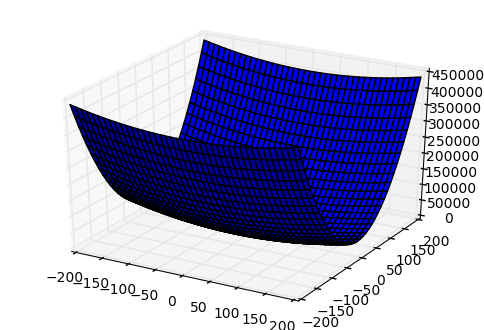

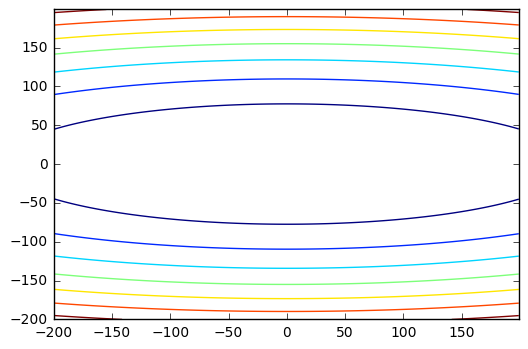

In [30]:
X = np.arange(graph_range[0], graph_range[1], 1)
Y = np.arange(graph_range[0], graph_range[1], 1)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)    
plt.show()
    
plt.figure()
plt.contour(X, Y, Z)
plt.show()  


# Método do Gradiente com Passo Fixo

A primeira versão do método do gradiente pode ser demonstrado com a escolha de um passo fixo, no caso $l_k = 0.1$, ou seja, em cada passo do algoritmo vamos andar exatamente 10% do tamanho do vetor gradiente. Também estamos limitando o número de iterações em 20 para evitar que o algoritmo rode para sempre.

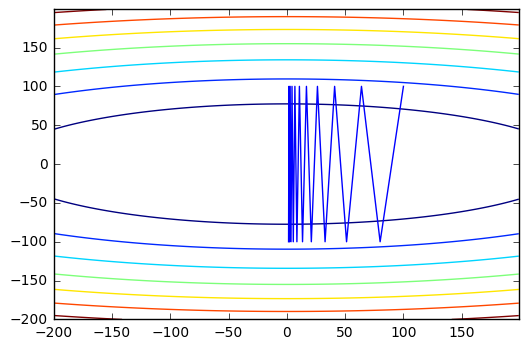

In [31]:
def grad_descent_fss(x0, max_iter=20):
    if np.linalg.norm(grad_f(x0)) < global_tol:
        return []

    x_seq = []
    step_size = 0.1

    iter = 0
    xk = x0    
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > global_tol:
        dk = -grad_f(xk)        
        x_seq.append(xk)
        xk = xk + (step_size * dk)
        iter += 1

    return np.array(x_seq)

seq_x = grad_descent_fss(start_point)
X = np.arange(graph_range[0], graph_range[1], 1)
Y = np.arange(graph_range[0], graph_range[1], 1)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

plt.figure()
plt.contour(X, Y, Z)
plt.plot(seq_x[:, 0], seq_x[:, 1])
plt.show()

# Método do Gradiente com *Backtrack Linear Search*

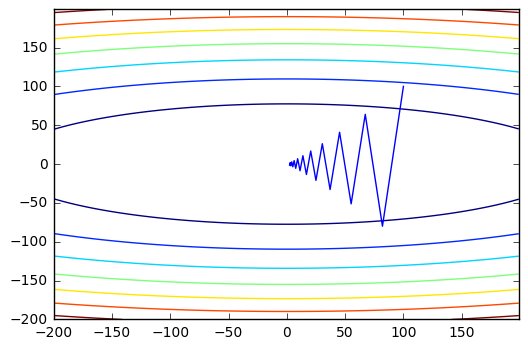

In [33]:
def grad_descent_btls(x0, max_iter=20):
    if np.linalg.norm(grad_f(x0)) < global_tol:
        return []

    x_seq = []

    iter = 0
    xk = x0
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > global_tol:
        dk = -grad_f(xk)

        # Backtrack line search
        step_size = 1.0
        alpha = 0.1
        beta = 0.3
        while f(xk + step_size * dk) > (f(xk) + alpha * step_size * dk.dot(dk)):
            step_size *= beta

        x_seq.append(np.copy(xk))
        xk += step_size * dk

        iter += 1

    return np.array(x_seq)

seq_x = grad_descent_btls(start_point)

X = np.arange(graph_range[0], graph_range[1], 1)
Y = np.arange(graph_range[0], graph_range[1], 1)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

plt.figure()
plt.contour(X, Y, Z)
plt.plot(seq_x[:, 0], seq_x[:, 1])
plt.show()